# Finans Project 2 - English
This notebook is for assistance with the coding of some questions in the project.
The sections are marked with the corresponding question in the project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions.

#### Initialize Python Packages

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Read Data

In [30]:
# Path to file (insert your own path)
file_path = '/Users/artur/IdeaProjects/statistics/Introduction-to-Statistics/finans2/finans2_data.csv'

# Load data
D = pd.read_csv(file_path,sep=';')

# Change name of column Geo.mean to Geo_mean, due to the period can cause issues
D = D.rename(columns={'Geo.mean':'Geo_mean'})

# set index of dataframe to be ETF
D = D.set_index('ETF')
D

,Geo_mean,Volatility,maxTuW
ETF,,,
SPY,0.104904,2.478601,309
MDY,0.139547,2.925897,327
EWJ,-0.026201,2.699671,327
EWH,0.112672,3.373114,302
EWG,0.050381,3.800206,177
...,...,...,...
IAU,0.125072,2.852106,333
SLV,0.029097,4.830741,333
USO,-0.275651,4.803064,319


#### Split the data
Save four ETF's for testing only. Use all the others for parameter estimation.

In [31]:
# Subset containing only AGG, VAW, IWN and SPY for validation
D_test = D[D.index.isin(['AGG','VAW','IWN','SPY'])]

# Subset containing all remaining ETFs for model estimation
D_model = D[~D.index.isin(['AGG','VAW','IWN','SPY'])]

#### a) Present a short descriptive analysis and summary

In [32]:
print(f"Dimension of DataFrame: {D.shape}") # f-strings allow us to insert variables directly into the string
print(f"Variable names: {D.columns}")
print("\nFirst few rows of DataFrame:") # \n is the newline character for strings
display(D.head())
print("Last row of DataFrame:")
display(D.tail())
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)

Dimension of DataFrame: (95, 3)
Variable names: Index(['Geo_mean', 'Volatility', 'maxTuW'], dtype='object')

First few rows of DataFrame:


,Geo_mean,Volatility,maxTuW
ETF,,,
SPY,0.104904,2.478601,309
MDY,0.139547,2.925897,327
EWJ,-0.026201,2.699671,327
EWH,0.112672,3.373114,302
EWG,0.050381,3.800206,177


Last row of DataFrame:


,Geo_mean,Volatility,maxTuW
ETF,,,
IAU,0.125072,2.852106,333
SLV,0.029097,4.830741,333
USO,-0.275651,4.803064,319
SHY,0.013215,0.196579,375
TLT,0.082737,2.018799,182


Some summary statistics:


,Geo_mean,Volatility,maxTuW
count,95.000000,95.000000,95.000000
mean,0.076904,3.059812,307.294737
std,0.080867,0.879042,42.767524
min,-0.275651,0.196579,172.000000
25%,0.028712,2.587946,309.000000
50%,0.082737,3.026361,324.000000
75%,0.134381,3.675211,327.000000
max,0.336390,4.830741,375.000000


Data types: Geo_mean      float64
Volatility    float64
maxTuW          int64
dtype: object


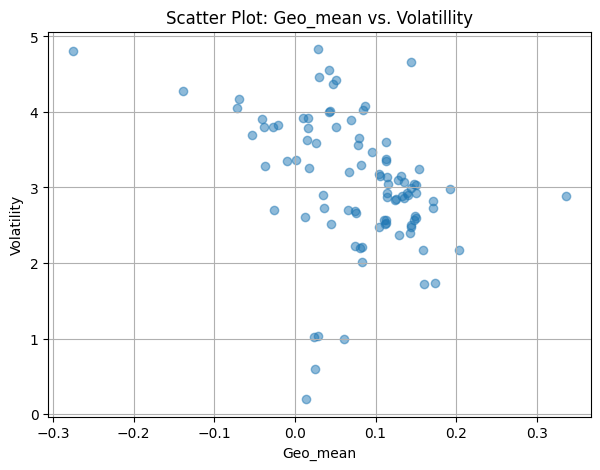

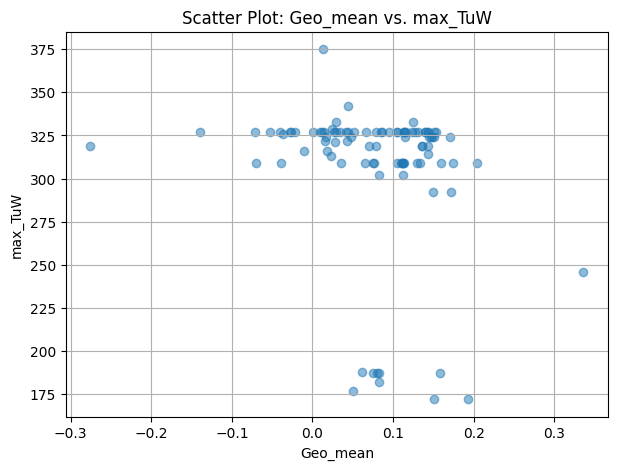

In [33]:
#Geo Mean over VOllatility
#Extract the weekly returns for Geo mean, Volatility, maxTuw
geo = D["Geo_mean"]
vol = D["Volatility"]
max_TuW = D["maxTuW"]

plt.figure(figsize=(7,5))
plt.scatter(geo, vol, alpha=0.5)
plt.xlabel("Geo_mean")
plt.ylabel("Volatility")
plt.title("Scatter Plot: Geo_mean vs. Volatillity")
plt.grid(True)
plt.show()

# Geo mean over maxTuW
plt.figure(figsize=(7,5))
plt.scatter(geo, max_TuW, alpha=0.5)
plt.xlabel("Geo_mean")
plt.ylabel("max_TuW")
plt.title("Scatter Plot: Geo_mean vs. max_TuW")
plt.grid(True)
plt.show()

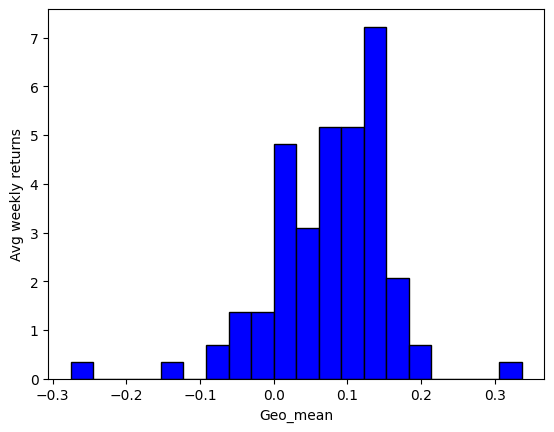

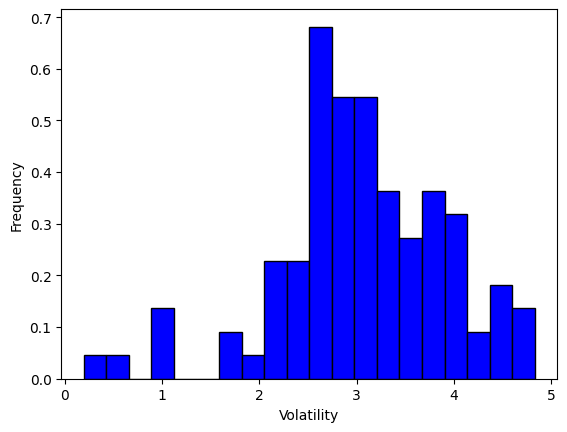

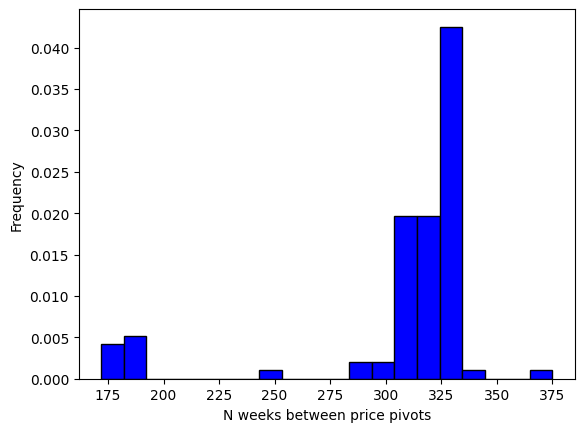

In [34]:
#Histogramns
#all 3 var
## Histogram describing the empirical density of the weekly returns from
## AGG (histogram of weekly returns normalized to have an area of 1)
plt.hist(geo.dropna(), bins=20, density=True, color='blue', edgecolor='black') # dropna() removes potential missing values
plt.xlabel('Geo_mean')
plt.ylabel('Avg weekly returns')
plt.show()

plt.hist(vol.dropna(), bins=20, density=True, color='blue', edgecolor='black') # dropna() removes potential missing values
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

plt.hist(max_TuW.dropna(), bins=20, density=True, color='blue', edgecolor='black') # dropna() removes potential missing values
plt.xlabel('N weeks between price pivots')
plt.ylabel('Frequency')
plt.show()


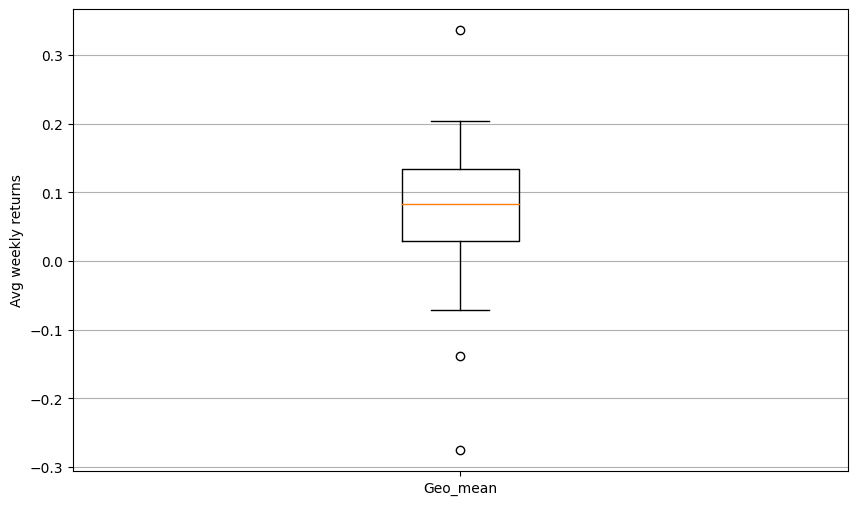

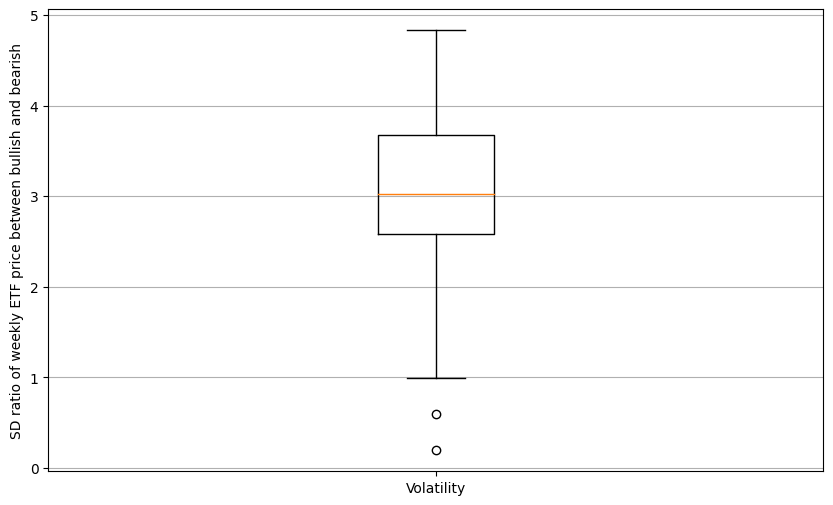

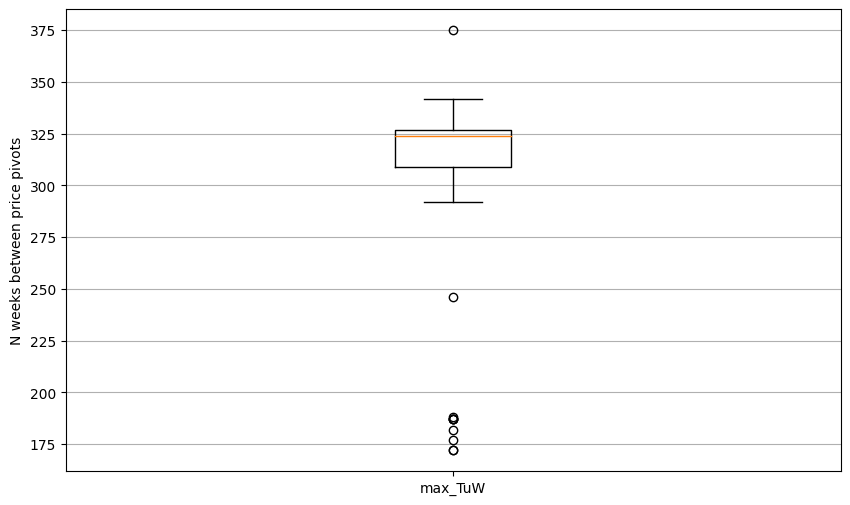

In [35]:
plt.figure(figsize=(10, 6))
plt.boxplot([geo], labels=['Geo_mean'])

plt.ylabel("Avg weekly returns")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([vol], labels=['Volatility'])
plt.ylabel("SD ratio of weekly ETF price between bullish and bearish")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([max_TuW], labels=['max_TuW'])
plt.ylabel("N weeks between price pivots")
plt.grid(axis='y')
plt.show()

#### b) Formulate a multiple linear regression model

In [ ]:
#Model is written and explained in report.


#### c) Fitting the model - Estimating parameters

In [37]:
# Estimate multiple linear regression model
fit = smf.ols('Geo_mean ~ Volatility + maxTuW', data=D_model).fit()
display(fit.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Geo_mean   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.152
No. Observations:                  91   F-statistic:                     9.039
Covariance Type:            nonrobust   Prob (F-statistic):           0.000269
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2528      0.058      4.323      0.000       0.137       0.369
Volatility    -0.0351      0.010     -3.613      0.001      -0.054      -0.016
maxTuW        -0.0002      0.000     -1.154      0.252      -0.001       0.000
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### d) Model validation

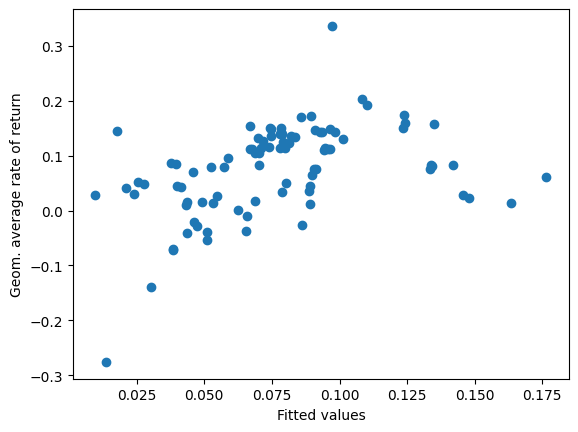

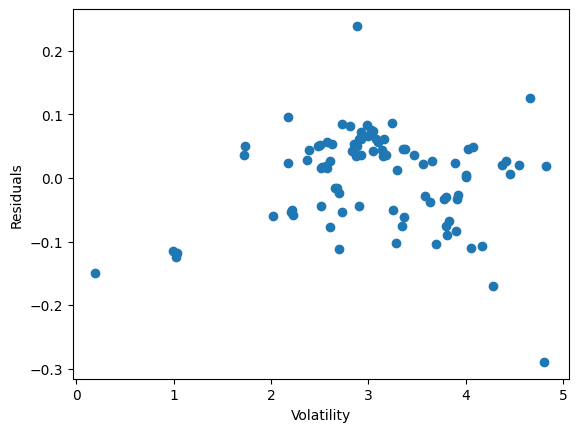

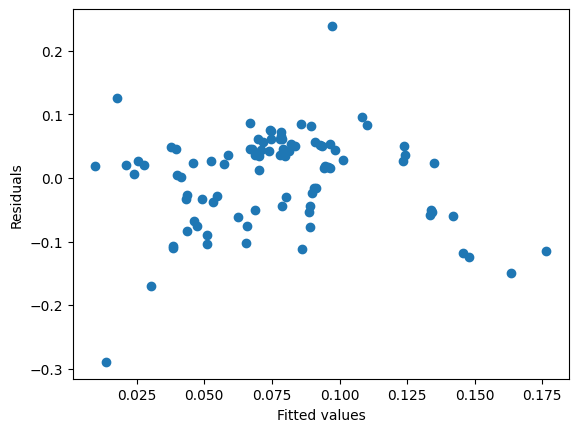

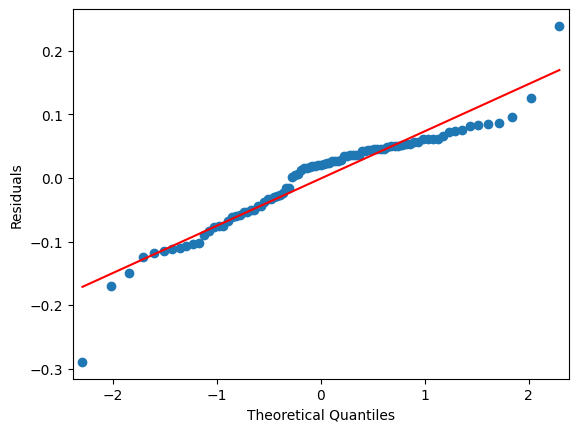

In [41]:
# Observations against fitted values
plt.scatter(fit.fittedvalues, D_model.Geo_mean)
plt.xlabel("Fitted values")
plt.ylabel("Geom. average rate of return")
plt.show()

# Residuals against each of the explanatory variables
plt.scatter(D_model.Volatility, fit.resid)
plt.xlabel("Volatility")
plt.ylabel("Residuals")
plt.show()
# Residuals against fitted values
plt.scatter(fit.fittedvalues, fit.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Normal QQ-plot of the residuals
sm.qqplot(fit.resid, line='q')
plt.ylabel("Residuals")
plt.show()

#### e) Confidence interval

In [39]:
# Confidence intervals for the model coefficients
fit.conf_int(alpha=0.05)

,0,1
Intercept,0.136617,0.369062
Volatility,-0.054453,-0.015809
maxTuW,-0.000600,0.000159


     Measured    Predic
ETF                    
SPY  0.104904  0.097678
IWN  0.066849  0.068314
AGG  0.024794  0.159354
VAW  0.113346  0.054025


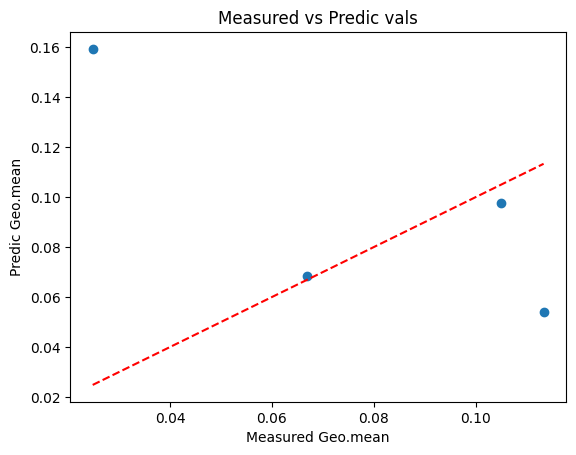

In [45]:
# Make predict on the test set
pre = fit.predict(D_test)

# Combine pre and meas vals into one DataFrame
res = pd.DataFrame({
    'Measured': D_test.Geo_mean,
    'Predic': pre
})

# Display the results
print(res)

# Plot measured vs pre vals
plt.scatter(res['Measured'], res['Predic'])
plt.plot([res['Measured'].min(), res['Measured'].max()],
         [res['Measured'].min(), res['Measured'].max()],
         color='red', linestyle='--')
plt.xlabel("Measured Geo.mean")
plt.ylabel("Predic Geo.mean")
plt.title("Measured vs Predic vals")
plt.show()

#### f) Hypothetis

In [50]:
BETA_one_hat = -0.0351 #given the beeta val
BETA_one_0 = -0.06 #second beta val
sd_error = 0.010 #sd error
df = 88 #degrees of freedom
t_stat = (BETA_one_hat - BETA_one_0) / sd_error #t computation
p_value = 2 * stats.t.sf(abs(t_stat), df) # p val

print(t_stat, p_value)

2.4899999999999998 0.014653328286796705


#### g) Backward selection

In [47]:
# Estimate multiple linear regression model
fit = smf.ols('Geo_mean ~ Volatility', data=D_model).fit()
display(fit.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Geo_mean   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.148
No. Observations:                  91   F-statistic:                     16.69
Covariance Type:            nonrobust   Prob (F-statistic):           9.62e-05
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1949      0.030      6.504      0.000       0.135       0.254
Volatility    -0.0382      0.009     -4.085      0.000      -0.057      -0.020
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### h) Predictions

In [40]:
# Predictions and 95% prediction intervals
final_model = fit # Insert your final model. Must be same format as "fit"
pred = final_model.get_prediction(D_test).summary_frame(alpha=0.05)
pred.set_index(D_test.index, inplace=True)


# Observed values and predictions
# New dataframe
res = pd.DataFrame({'Geo_mean': D_test['Geo_mean'],'pred': pred['mean'],'pred_lower': pred['obs_ci_lower'],'pred_upper':pred['obs_ci_upper']})
display(res)

,Geo_mean,pred,pred_lower,pred_upper
ETF,,,,
SPY,0.104904,0.097678,-0.054296,0.249652
IWN,0.066849,0.068314,-0.083367,0.219995
AGG,0.024794,0.159354,-0.000526,0.319233
VAW,0.113346,0.054025,-0.097864,0.205915
